<a href="https://colab.research.google.com/github/LoyalScriptX/Predictive-Analytics-and-Strategy-Backtesting-for-Stocks/blob/main/Predictive_Analytics_and_Strategy_Backtesting_for_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd

# Download historical stock data
stocks = ['AAPL', 'MSFT']
data = {stock: yf.download(stock, start='2015-01-01', end='2024-01-01') for stock in stocks}

# Save data
for stock, df in data.items():
    df.to_csv(f'{stock}_data.csv')

# Load data
dfs = {stock: pd.read_csv(f'{stock}_data.csv', parse_dates=['Date'], index_col='Date') for stock in stocks}

# Preprocess: Fill missing values
for stock, df in dfs.items():
    df.ffill(inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Download historical stock data for Apple and Microsoft from 2015 to 2024.
Save the data to CSV files and then load the data into pandas DataFrames.
Fill missing values using forward fill to ensure the data is complete.


In [ ]:
# Summary statistics for each stock
for stock, df in dfs.items():
    print(f"Statistics for {stock}:")
    print(df.describe())


Statistics for AAPL:
              Open         High          Low        Close    Adj Close  \
count  2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean     83.956509    84.876609    83.092088    84.026440    81.852794   
std      55.979856    56.611354    55.396020    56.034699    56.305992   
min      22.500000    22.917500    22.367500    22.584999    20.720039   
25%      35.452501    35.651249    35.243749    35.439376    32.999375   
50%      54.039999    54.740000    53.270000    53.868752    51.509108   
75%     141.444996   143.274998   139.239998   141.710003   139.800026   
max     198.020004   199.619995   197.000000   198.110001   197.361084   

             Volume  
count  2.264000e+03  
mean   1.237607e+08  
std    6.818458e+07  
min    2.404830e+07  
25%    7.831732e+07  
50%    1.056556e+08  
75%    1.486811e+08  
max    6.488252e+08  
Statistics for MSFT:
              Open         High          Low        Close    Adj Close  \
count  2264.000000 

 Generate and display summary statistics for each stock.
 This includes key metrics such as mean, standard deviation, minimum, and maximum values.


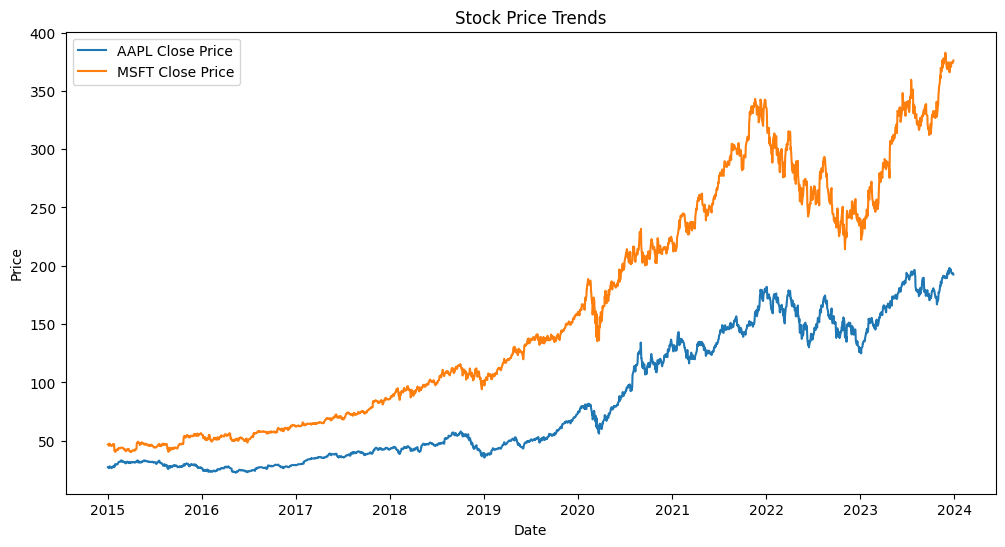

In [ ]:
import matplotlib.pyplot as plt

# Plot historical price trends for selected stocks
plt.figure(figsize=(12, 6))
for stock, df in dfs.items():
    plt.plot(df.index, df['Close'], label=f'{stock} Close Price')
plt.title('Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Plot the historical price trends for Apple and Microsoft. This visualization helps in comparing the price movements and identifying trends over time.


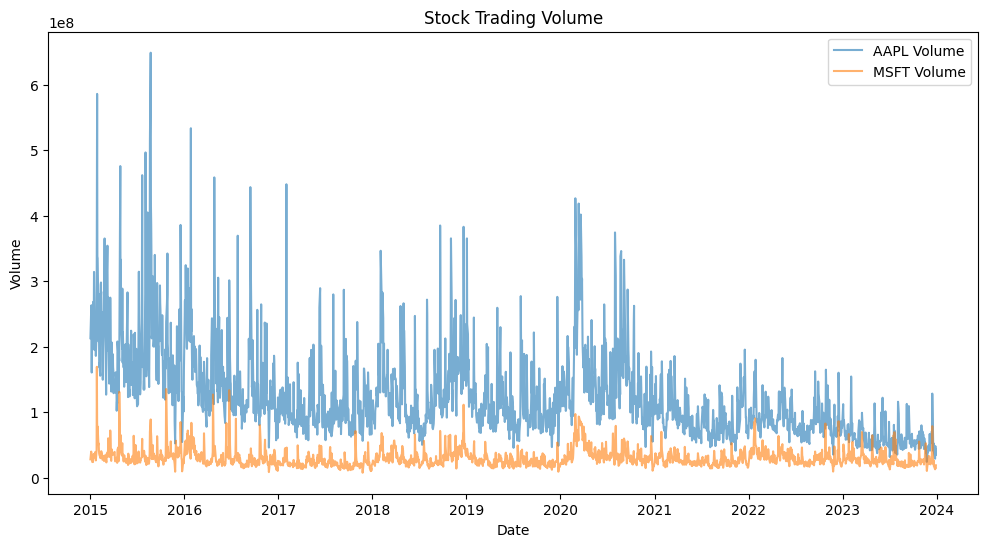

In [ ]:
# Plot trading volume for selected stocks
plt.figure(figsize=(12, 6))
for stock, df in dfs.items():
    plt.plot(df.index, df['Volume'], label=f'{stock} Volume', alpha=0.6)
plt.title('Stock Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


Plot the trading volume for Apple and Microsoft.
This visualization shows the volume of shares traded over time, highlighting variations in trading activity.


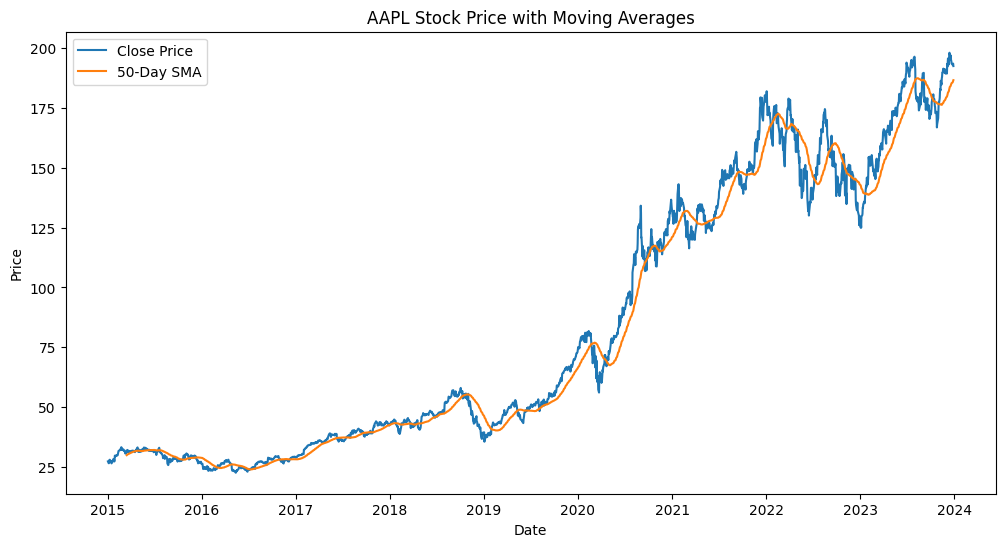

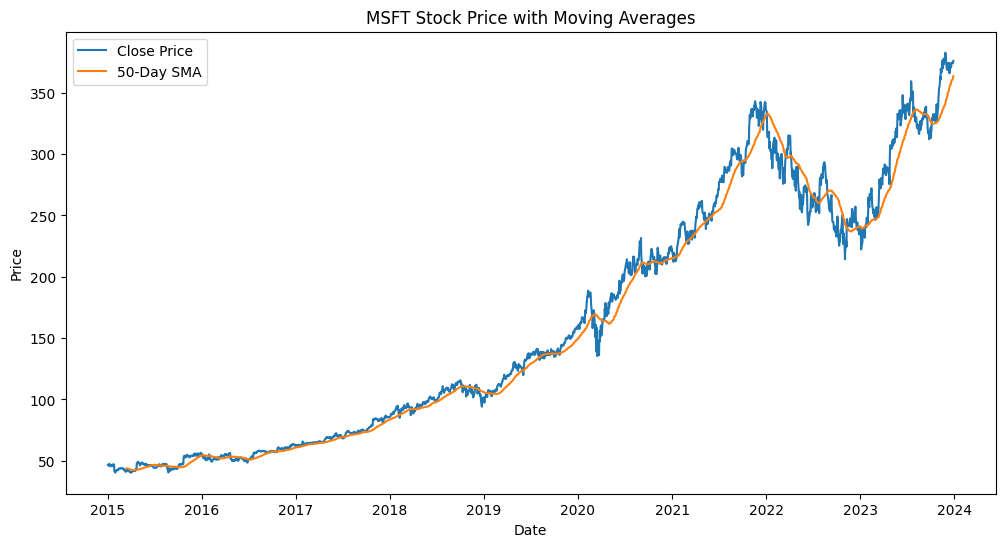

In [ ]:
# Calculate and plot moving averages
for stock, df in dfs.items():
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['SMA_50'], label='50-Day SMA')
    plt.title(f'{stock} Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


Calculate and plot the 50-day Simple Moving Average (SMA) for each stock.
The plot shows the closing price along with the 50-day SMA to identify trends and smooth out short-term fluctuations.


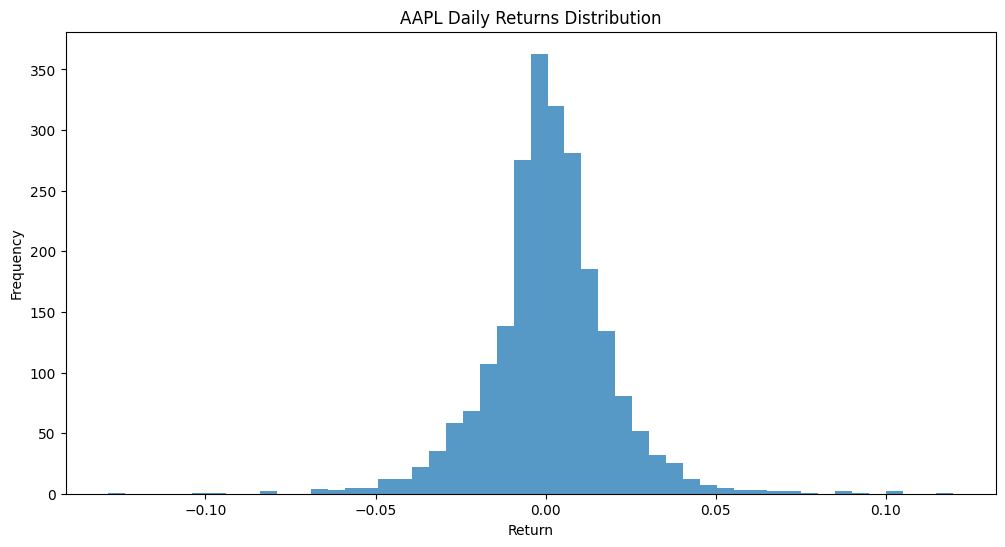

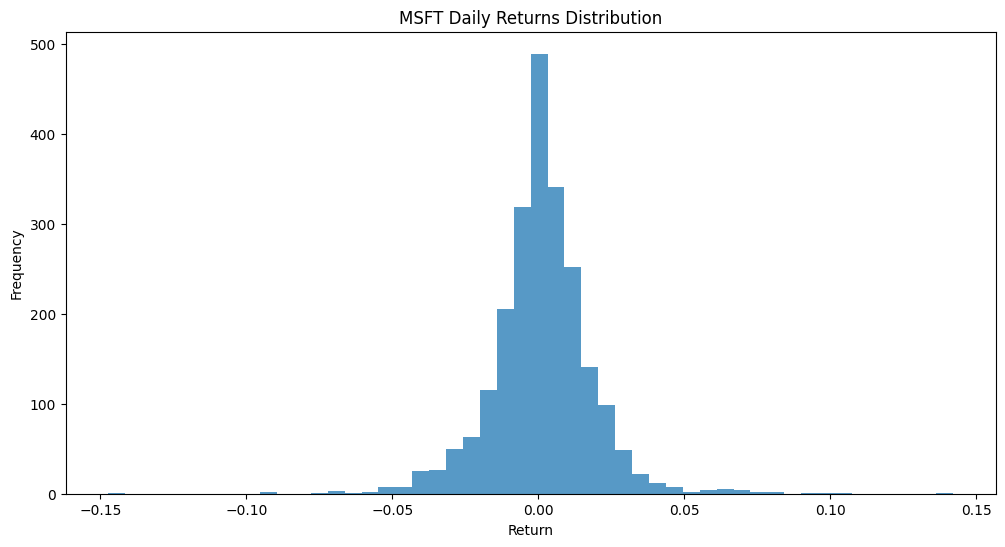

In [ ]:
# Calculate returns and risk metrics
for stock, df in dfs.items():
    df['Daily Return'] = df['Close'].pct_change()

    plt.figure(figsize=(12, 6))
    plt.hist(df['Daily Return'].dropna(), bins=50, alpha=0.75)
    plt.title(f'{stock} Daily Returns Distribution')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.show()



Calculate and plot the daily returns for each stock.
The histogram shows the distribution of returns, providing insight into the stock's volatility and risk.


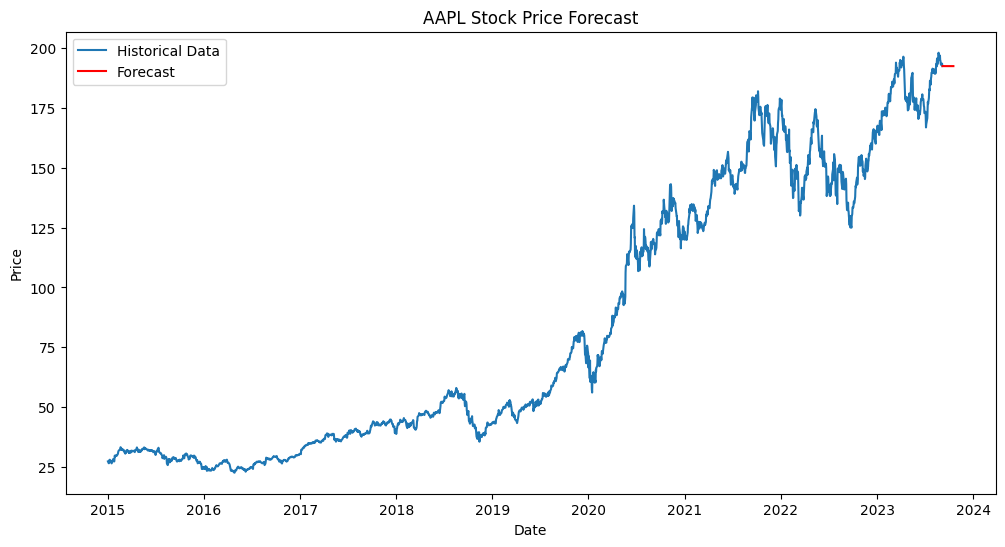

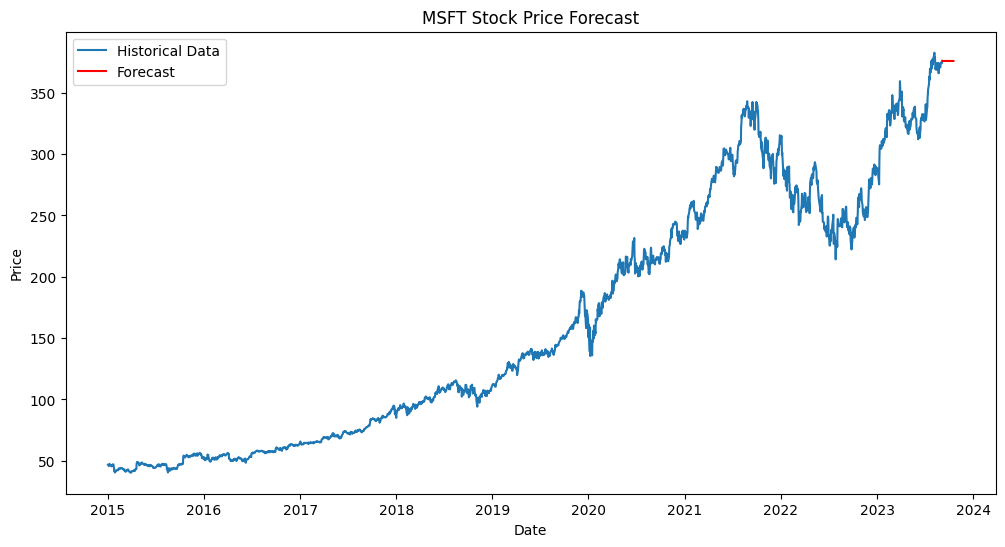

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# ARIMA Model for forecasting
for stock, df in dfs.items():
    # Ensure the DateTime index has a frequency
    if df.index.freq is None:
        df.index = pd.date_range(start=df.index[0], periods=len(df), freq='B')

    # Fit ARIMA model
    model = ARIMA(df['Close'], order=(5, 1, 0))
    model_fit = model.fit()

    # Forecast the next 30 days
    forecast = model_fit.forecast(steps=30)

    # Create a date range for the forecast period
    forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Historical Data')
    plt.plot(forecast_dates, forecast, label='Forecast', color='red')
    plt.title(f'{stock} Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


Fit an ARIMA model to forecast the stock prices for the next 30 days.
Plot the historical data alongside the forecasted values to visualize potential future trends.


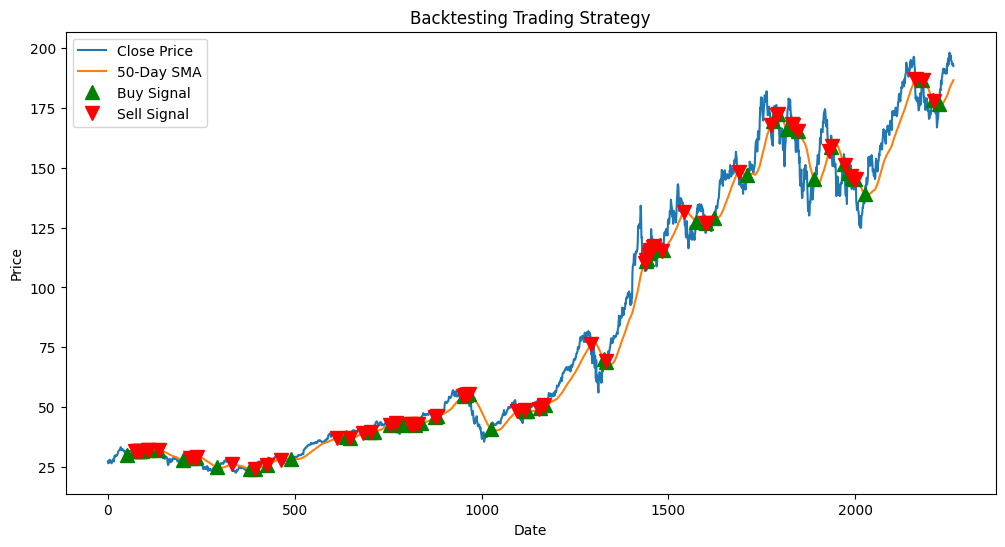

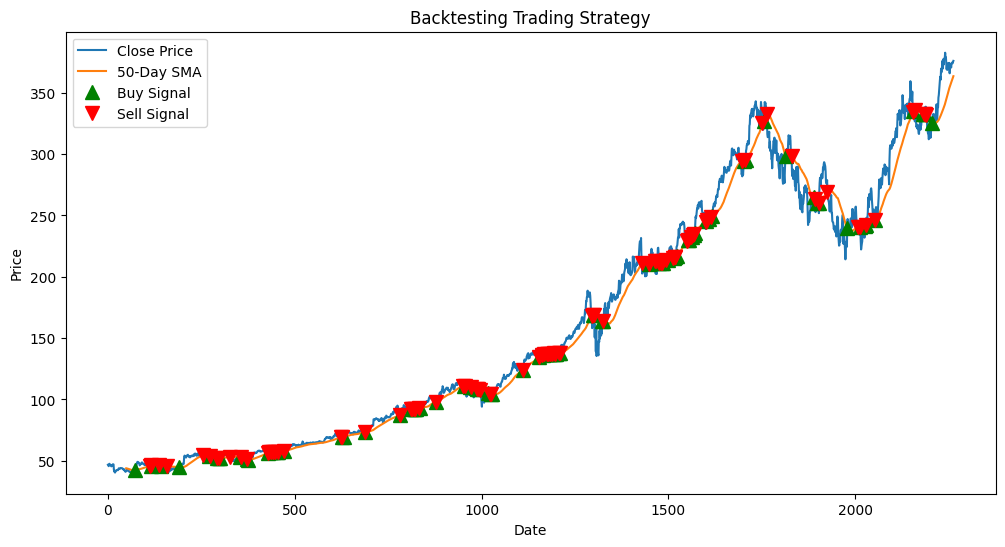

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Backtesting Example
def backtest_strategy(df):
    df['Signal'] = 0
    df.loc[df.index[50:], 'Signal'] = np.where(df['Close'][50:] > df['SMA_50'][50:], 1, 0)
    df['Position'] = df['Signal'].diff()

    plt.figure(figsize=(12, 6))
    plt.plot(df['Close'], label='Close Price')
    plt.plot(df['SMA_50'], label='50-Day SMA')
    plt.plot(df[df['Position'] == 1].index, df['SMA_50'][df['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
    plt.plot(df[df['Position'] == -1].index, df['SMA_50'][df['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
    plt.title('Backtesting Trading Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

for stock, df in dfs.items():
    df['SMA_50'] = df['Close'].rolling(window=50).mean()

    # Convert index to RangeIndex to ensure consistent behavior with .loc
    df.reset_index(drop=True, inplace=True)

    backtest_strategy(df)


Backtest a trading strategy using the 50-day SMA.

Generate buy and sell signals based on the SMA, and plot these signals to evaluate the strategy's performance.


# CONCLUSION:

 **This project involved a comprehensive analysis of historical stock data for Apple and Microsoft. We started by collecting and preprocessing the data, then explored it through summary statistics and visualizations of price trends and trading volumes. We calculated moving averages and assessed daily returns to understand stock volatility. Forecasting with the ARIMA model provided insights into potential future price movements. Finally, we backtested a trading strategy based on the 50-day SMA to evaluate its performance. Overall, this analysis offers valuable insights into stock behavior and helps in making informed investment decisions.**